In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
#!pip install pydot>=1.2.4
import pydot
#!pip install pydotplus
import pydotplus
from IPython.display import Image
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn import svm, datasets
from scipy import interp
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
features = pd.read_csv("sampled_picked_features.csv")

In [32]:
feature_list = list(features.columns)
feature_list

['percentage_reg_seats_activated',
 'bmt_product_groupIC/Suites',
 'bmt_product_groupLT Family',
 'bmt_product_groupOther',
 'uuid_age_days',
 'days_since_order_created',
 'uuid_seats_on_active_subs',
 'active_registered_seat_sum',
 'discount_rate',
 'srp_billed_usd',
 'parent_owner_uuid_count',
 'percentage_reg_seats_activated_channel_partner_csn',
 'sf_subscription_seats_billed',
 'deploymentNetworked',
 'deploymentSession Specific Network',
 'deploymentStandalone',
 'renewal_rate',
 'self_parented',
 'hier_industry_group_nameEDU',
 'hier_industry_group_nameM&E',
 'hier_industry_group_nameMFG',
 'hier_industry_group_nameMulti AEC Lead',
 'hier_industry_group_nameMulti EDU Lead',
 'hier_industry_group_nameMulti M&E Lead',
 'hier_industry_group_nameMulti MFG Lead',
 'hier_industry_group_nameMulti OTH Lead',
 'hier_industry_group_nameMulti Unknown Lead',
 'hier_industry_group_nameOTH',
 'hier_industry_group_nameUnknown',
 'discount_rate_channel_partner_csn',
 'percentage_reg_seats_activ

# Features and Targets and Convert Data to Arrays

In [3]:
# Labels are the values we want to predict
labels = np.array(features['activation_label'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop(['activation_label', 'percentage_reg_seats_activated'], axis = 1)
#features= features.drop(car, axis = 1)

In [4]:
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [15]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

# 1. Random Forest

In [6]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [7]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
accuracy_score(predictions, test_labels)

0.72145512480084972

In [8]:
y_pred_rf = rf.predict_proba(test_features)

In [9]:
test_labels

array([1, 1, 1, ..., 1, 3, 3], dtype=int64)

In [10]:
s = pd.Series(test_labels.tolist())
test_Y = pd.get_dummies(s)
test_Y = test_Y.values

In [91]:
# Compute ROC curve and ROC area for each class
#classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators = 1000, random_state = 42))
#y_score = classifier.fit(train_features, train_labels).decision_function(test_features)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:,i], y_pred_rf[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_Y.ravel(), y_pred_rf.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

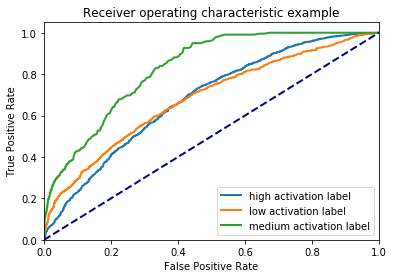

In [117]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], lw=lw, label='high activation label')
plt.plot(fpr[0], tpr[0], lw=lw, label='low activation label')
plt.plot(fpr[1], tpr[1], lw=lw, label='medium activation label')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [134]:
y_pred_rf

array([[ 0.448,  0.008,  0.544],
       [ 0.104,  0.001,  0.895],
       [ 0.353,  0.146,  0.501],
       ..., 
       [ 0.395,  0.118,  0.487],
       [ 0.357,  0.08 ,  0.563],
       [ 0.196,  0.075,  0.729]])

In [18]:
cm = confusion_matrix(test_labels, predictions); cm

array([[ 217,    7,  649],
       [  27,   27,  205],
       [ 149,   12, 2473]], dtype=int64)

In [17]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

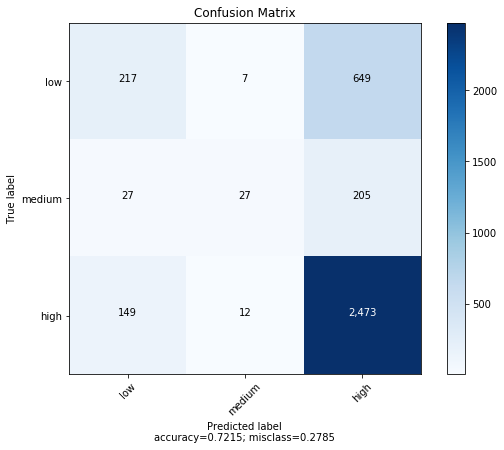

In [20]:
plot_confusion_matrix(cm           = cm, 
                      normalize    = False,
                      target_names = ['low', 'medium', 'high'],
                      title        = "Confusion Matrix")


# Visualizing a Single Decision Tree

In [29]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

true positive, false positive

In [42]:
y_test.shape

(75, 3)

In [34]:
y_score.shape

(75, 3)

In [52]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

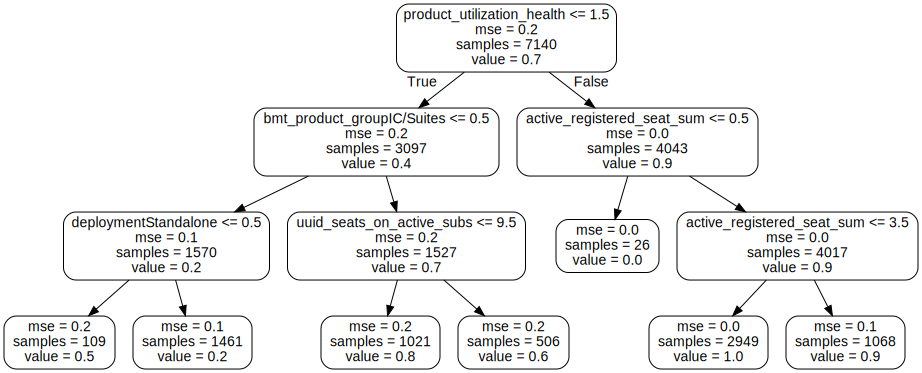

In [51]:
import graphviz
from IPython.display import display
display(graphviz.Source(graph))

# Variable Importances 

In [40]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: product_utilization_health Importance: 0.32
Variable: bmt_product_groupIC/Suites Importance: 0.16
Variable: uuid_age_days        Importance: 0.06
Variable: days_since_order_created Importance: 0.05
Variable: uuid_seats_on_active_subs Importance: 0.04
Variable: active_registered_seat_sum Importance: 0.04
Variable: discount_rate        Importance: 0.03
Variable: srp_billed_usd       Importance: 0.02
Variable: total_billed_usd     Importance: 0.02
Variable: parent_owner_uuid_count Importance: 0.02
Variable: percentage_reg_seats_activated_channel_partner_csn Importance: 0.02
Variable: sf_subscription_seats_billed Importance: 0.01
Variable: deploymentStandalone Importance: 0.01
Variable: renewal_rate         Importance: 0.01
Variable: self_parented        Importance: 0.01
Variable: hier_industry_group_nameMFG Importance: 0.01
Variable: onboarding_health    Importance: 0.01
Variable: access_health        Importance: 0.01
Variable: support_health       Importance: 0.01
Variable: dis

In [ ]:
names = ["car_pings_since_agreement_start_channel_partner_csn", "car_pings_since_agreement_start_country_code", "discount_rate",  "renewal_rate", "parent_named_account_flg", "named_account_flg", "self_parented", "bmt_product_group", "customer_size_code", "country_code", "billing_behavior", "bmt_channel", "uuid_age_days", "days_since_order_created", "uuid_seats_on_active_subs" , "active_registered_seat_sum" , "srp_billed_usd" , "parent_owner_uuid_count" , "hier_industry_group_name" , "active_registered_seat_sum_partner"]

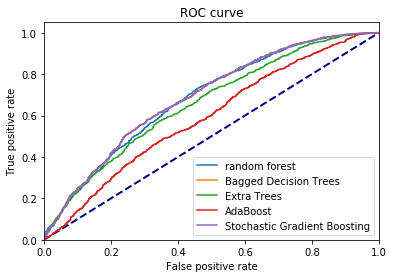

In [116]:
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.plot(fpr[2], tpr[2], label='random forest')
plt.plot(fpr_bdt[2], tpr_bdt[2], label='Bagged Decision Trees')
plt.plot(fpr_et[2], tpr_et[2], label='Extra Trees')
plt.plot(fpr_ab[2], tpr_ab[2], label='AdaBoost')
plt.plot(fpr_sgb[2], tpr_sgb[2], label='Stochastic Gradient Boosting')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# 2. Bagged Decision Trees

In [22]:
seed = 42
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier(max_depth=5)
num_trees = 1000
bdt = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
# Train the model on training data
bdt.fit(train_features, train_labels);
y_pred_bdt = bdt.predict_proba(test_features)

In [23]:
predictions = bdt.predict(test_features)
accuracy_score(predictions, test_labels)

0.72251725969198088

In [125]:
results = model_selection.cross_val_score(bdt, test_features, test_labels, cv=kfold)
print(results.mean())

0.714020260737


In [112]:
# Compute ROC curve and ROC area for each class
#classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators = 1000, random_state = 42))
#y_score = classifier.fit(train_features, train_labels).decision_function(test_features)
fpr_bdt = dict()
tpr_bdt = dict()
roc_auc_bdt = dict()
for i in range(n_classes):
    fpr_bdt[i], tpr_bdt[i], _ = roc_curve(test_labels[:,i], y_pred_bdt[:,i])
    roc_auc_bdt[i] = auc(fpr_bdt[i], tpr_bdt[i])

# Compute micro-average ROC curve and ROC area
fpr_bdt["micro"], tpr_bdt["micro"], _ = roc_curve(test_Y.ravel(), y_pred_rf.ravel())
roc_auc_bdt["micro"] = auc(fpr_bdt["micro"], tpr_bdt["micro"])

# 3. Extra Trees

In [24]:
seed = 42
num_trees = 1000
max_features = 15
kfold = model_selection.KFold(n_splits=10, random_state=seed)
et = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
# Train the model on training data
et.fit(train_features, train_labels);
y_pred_et = et.predict_proba(test_features)

In [25]:
predictions = et.predict(test_features)
accuracy_score(predictions, test_labels)

0.70817843866171004

In [126]:
results = model_selection.cross_val_score(et, test_features, test_labels, cv=kfold)
print(results.mean())

0.687476014448


In [113]:
# Compute ROC curve and ROC area for each class
#classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators = 1000, random_state = 42))
#y_score = classifier.fit(train_features, train_labels).decision_function(test_features)
fpr_et = dict()
tpr_et = dict()
roc_auc_et = dict()
for i in range(n_classes):
    fpr_et[i], tpr_et[i], _ = roc_curve(test_labels[:,i], y_pred_et[:,i])
    roc_auc_et[i] = auc(fpr_et[i], tpr_et[i])

# Compute micro-average ROC curve and ROC area
fpr_et["micro"], tpr_et["micro"], _ = roc_curve(test_Y.ravel(), y_pred_rf.ravel())
roc_auc_et["micro"] = auc(fpr_et["micro"], tpr_et["micro"])

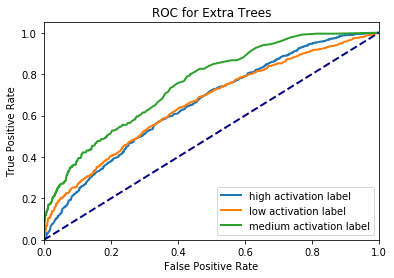

In [120]:
plt.figure()
lw = 2
plt.plot(fpr_et[2], tpr_et[2], lw=lw, label='high activation label')
plt.plot(fpr_et[0], tpr_et[0], lw=lw, label='low activation label')
plt.plot(fpr_et[1], tpr_et[1], lw=lw, label='medium activation label')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Extra Trees')
plt.legend(loc="lower right")
plt.show()

# 4. AdaBoost

In [26]:
seed = 42
num_trees = 1000
kfold = model_selection.KFold(n_splits=10, random_state=seed)
ab = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
# Train the model on training data
ab.fit(train_features, train_labels);
y_pred_ab = ab.predict_proba(test_features)

In [27]:
predictions = et.predict(test_features)
accuracy_score(predictions, test_labels)

0.70817843866171004

In [127]:
results = model_selection.cross_val_score(ab, test_features, test_labels, cv=kfold)
print(results.mean())

0.502640527118


In [114]:
# Compute ROC curve and ROC area for each class
#classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators = 1000, random_state = 42))
#y_score = classifier.fit(train_features, train_labels).decision_function(test_features)
fpr_ab = dict()
tpr_ab = dict()
roc_auc_ab = dict()
for i in range(n_classes):
    fpr_ab[i], tpr_ab[i], _ = roc_curve(test_labels[:,i], y_pred_ab[:,i])
    roc_auc_ab[i] = auc(fpr_ab[i], tpr_ab[i])

# Compute micro-average ROC curve and ROC area
fpr_ab["micro"], tpr_ab["micro"], _ = roc_curve(test_Y.ravel(), y_pred_rf.ravel())
roc_auc_ab["micro"] = auc(fpr_ab["micro"], tpr_ab["micro"])

# 5. Stochastic Gradient Boosting

In [23]:
seed = 42
num_trees =1000
kfold = model_selection.KFold(n_splits=10, random_state=seed)
sgb = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
# Train the model on training data
sgb.fit(train_features, train_labels);
y_pred_sgb = sgb.predict_proba(test_features)

In [24]:
predictions = sgb.predict(test_features)
accuracy_score(predictions, test_labels)

0.72012745618693574

In [25]:
cm = confusion_matrix(test_labels, predictions)

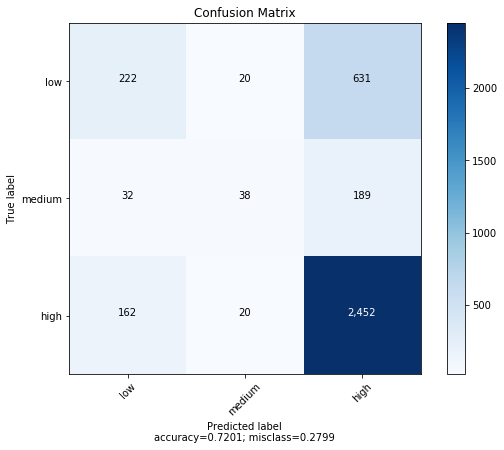

In [26]:
plot_confusion_matrix(cm           = cm, 
                      normalize    = False,
                      target_names = ['low', 'medium', 'high'],
                      title        = "Confusion Matrix")

In [115]:
# Compute ROC curve and ROC area for each class
#classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators = 1000, random_state = 42))
#y_score = classifier.fit(train_features, train_labels).decision_function(test_features)
fpr_sgb = dict()
tpr_sgb = dict()
roc_auc_sgb = dict()
for i in range(n_classes):
    fpr_sgb[i], tpr_sgb[i], _ = roc_curve(test_labels[:,i], y_pred_sgb[:,i])
    roc_auc_sgb[i] = auc(fpr_sgb[i], tpr_sgb[i])

# Compute micro-average ROC curve and ROC area
fpr_sgb["micro"], tpr_sgb["micro"], _ = roc_curve(test_Y.ravel(), y_pred_rf.ravel())
roc_auc_sgb["micro"] = auc(fpr_sgb["micro"], tpr_sgb["micro"])

# run ROC for high activation rate group

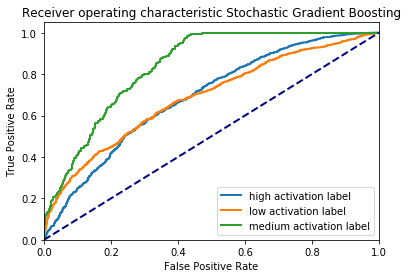

In [118]:
plt.figure()
lw = 2
plt.plot(fpr_sgb[2], tpr_sgb[2], lw=lw, label='high activation label')
plt.plot(fpr_sgb[0], tpr_sgb[0], lw=lw, label='low activation label')
plt.plot(fpr_sgb[1], tpr_sgb[1], lw=lw, label='medium activation label')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Stochastic Gradient Boosting')
plt.legend(loc="lower right")
plt.show()